## PHASE 1: BUSINESS UNDERSTANDING

Objectives:
1. To predict customer churn for a telecommunications company.
2. To analyze customer data to identify factors contributing to churn.
3. To gain insights from the analysis to develop retention strategies.

Hypothesis (Null and Alternative):
 
Null Hypothesis (H0):
There is no significant relationship between customer attributes and churn.
    
Alternative Hypothesis (H1):
Specific customer attributes significantly influence churn rates.


Business Questions:
1. What are the key factors that influence customer churn?
2. What is the relationship between monthly charges and customer churn?
3. What is the relationship between tenure and customer churn?
4. What is relationship between monthly charges, tenure and customer churn?
5. What is the lifetime value of each customer?
6. How can the company reduce the churn rate?
 



## PHASE 2: DATA UNDERSTANDING

a. Data Collection

In [1]:
#%pip install pyodbc  
#%pip install python-dotenv 

In [2]:
import pyodbc     
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package
import pandas as pd
import warnings 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


warnings.filterwarnings('ignore')

In [3]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

connection_string = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=dap-projects-database.database.windows.net;"
    "DATABASE=dapDB;"
    "UID=LP2_project;"
    "PWD=Stat$AndD@t@Rul3;"
)





In [4]:
# Create a connection string
#connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [5]:
# Use the connect method of the pyodbc library and pass in the connection string.

connection = pyodbc.connect(connection_string)

In [6]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "SELECT * FROM LP2_Telco_churn_first_3000"

data_1 = pd.read_sql(query, connection)
data_1.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [8]:
data_2=pd.read_csv(r"C:\Users\magyir\Downloads\\LP2_Telco-churn-second-2000.csv")
data_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [9]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [10]:
test_data=pd.read_csv(r"C:\Users\magyir\Downloads\Telco-churn-last-2000.csv")
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


b.  Data Description

Understand the features, types, and any data quality issues.

In [12]:
# Display summary statistics for numerical features- first dataset
data_1.describe()


,tenure,MonthlyCharges,TotalCharges
count,3000.000000,3000.000000,2995.000000
mean,32.527333,65.347400,2301.278315
std,24.637768,30.137053,2274.987884
min,0.000000,18.400000,18.799999
25%,9.000000,35.787499,415.250000
50%,29.000000,70.900002,1404.650024
75%,56.000000,90.262501,3868.725098
max,72.000000,118.650002,8564.750000


In [13]:
# Display summary statistics for numerical features- second dataset

data_2.describe()



,SeniorCitizen,tenure,MonthlyCharges
count,2043.000000,2043.000000,2043.000000
mean,0.168380,32.649046,64.712555
std,0.374295,24.376248,29.970010
min,0.000000,0.000000,18.550000
25%,0.000000,9.000000,35.825000
50%,0.000000,30.000000,70.250000
75%,0.000000,55.000000,89.625000
max,1.000000,72.000000,118.350000


In [14]:
# Display summary statistics for numerical features- test dataset
test_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,2000.000000,2000.000000,2000.000000
mean,0.161500,31.853000,63.933325
std,0.368084,24.632677,30.136858
min,0.000000,0.000000,18.250000
25%,0.000000,8.000000,34.250000
50%,0.000000,27.000000,69.800000
75%,0.000000,55.000000,89.275000
max,1.000000,72.000000,118.750000


In [15]:
# Display summary statistics for categorical features- first dataset
data_1.describe(include=['O'])

,customerID,gender,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Churn
count,3000,3000,2731,3000,2349,2349,2349,2349,2349,2349,3000,3000,2999
unique,3000,2,2,3,2,2,2,2,2,2,3,4,2
top,7590-VHVEG,Male,False,Fiber optic,False,False,False,False,False,True,Month-to-month,Electronic check,False
freq,1,1537,1437,1343,1478,1320,1296,1476,1190,1199,1641,1004,2219


In [16]:
# Display summary statistics for categorical features- second dataset
data_2.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043
unique,2043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,1991,2
top,5600-PDUJF,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,1022,1047,1412,1823,987,905,1029,911,923,996,828,831,1103,1220,696,5,1487


In [17]:
# Display summary statistics for categorical features- test dataset
test_data.describe(include=['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,2000,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,1930
top,7613-LLQFO,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.25
freq,1,1004,1056,1451,1807,966,848,991,857,876,1001,792,804,1131,1175,665,4


c. EDA and Data Cleaning 

In [18]:
# Check for missing values for first dataset
missing_values = data_1.isnull().sum()
missing_values[missing_values > 0]


MultipleLines       269
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
TotalCharges          5
Churn                 1
dtype: int64

In [19]:
# Check for missing values for second dataset
missing_values = data_2.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [20]:
# Check for missing values for test dataset
missing_values = test_data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [21]:
# Fill missing values for categorical features with the most frequent value (mode) for fisrt dataset. The first dataset is the only dataset with missing values.
categorical_features_with_missing_values = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn'
]

for feature in categorical_features_with_missing_values:
    mode_value = data_1[feature].mode()[0]
    data_1[feature].fillna(mode_value, inplace=True)

# Fill missing values for numerical features with the median
numerical_features_with_missing_values = ['TotalCharges']

for feature in numerical_features_with_missing_values:
    median_value = data_1[feature].median()
    data_1[feature].fillna(median_value, inplace=True)

# Verify that all missing values are handled
missing_values_after = data_1.isnull().sum()
missing_values_after[missing_values_after > 0]


Series([], dtype: int64)

In [22]:
# Replace spaces with NaN in 'TotalCharges' and convert to numeric
data_1['TotalCharges'] = pd.to_numeric(data_1['TotalCharges'].replace(" ", pd.NA), errors='coerce')
data_2['TotalCharges'] = pd.to_numeric(data_2['TotalCharges'].replace(" ", pd.NA), errors='coerce')
test_data['TotalCharges'] = pd.to_numeric(test_data['TotalCharges'].replace(" ", pd.NA), errors='coerce')

# Fill missing values with median for 'TotalCharges'
data_1['TotalCharges'].fillna(data_1['TotalCharges'].median(), inplace=True)
data_2['TotalCharges'].fillna(data_2['TotalCharges'].median(), inplace=True)
test_data['TotalCharges'].fillna(test_data['TotalCharges'].median(), inplace=True)




In [23]:
# Concatenate the datasets
data_combined = pd.concat([data_1,data_2], ignore_index=True)
print(data_combined.info())
#print(data_combined.head())
#print(data_combined.tail())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


i. Univariate Analysis

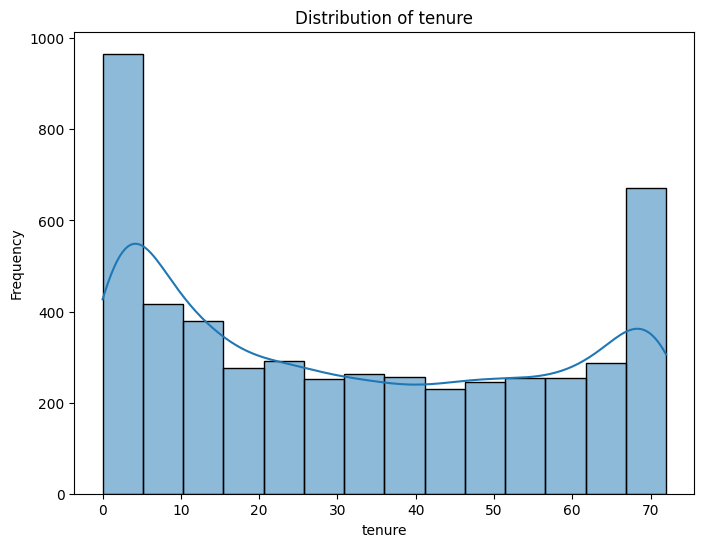

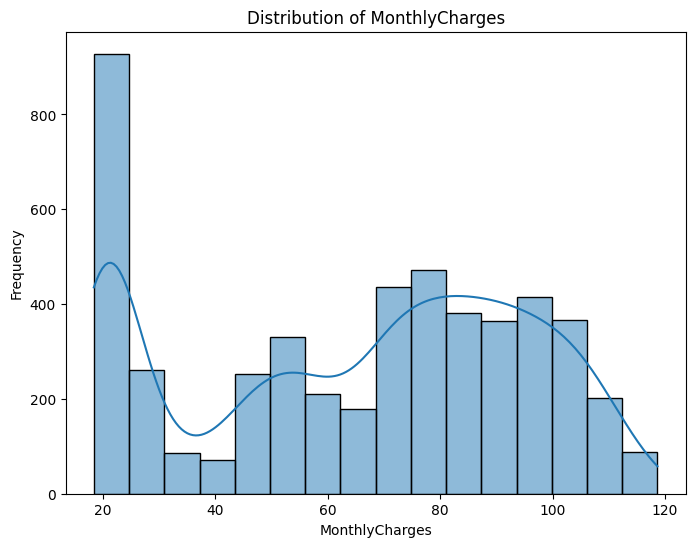

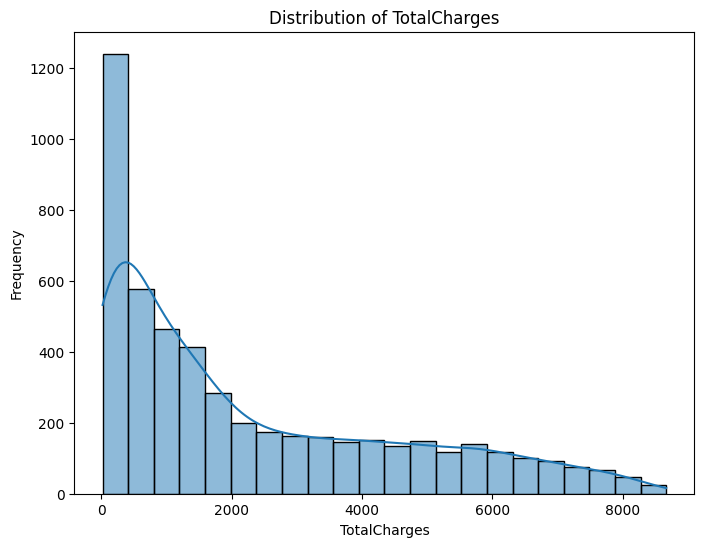

In [24]:
# Distribution plots for numerical features
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_combined[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Key Insights of Distribution Plots

Tenure:

Observation: There is a high number of customers with very short tenure (0-10 months) and a noticeable peak at the long tenure end (70+ months).

Insight: Many customers either leave very early or stay for a very long period.


MonthlyCharges:

Observation: Most customers have lower monthly charges, with smaller peaks at higher charge values.

Insight: The distribution is skewed towards lower monthly charges, indicating a larger customer base with basic or cheaper plans.


TotalCharges:

Observation: The total charges are heavily skewed to the right, with many customers having low total charges.

Insight: Many customers are relatively new or have not spent much over their tenure, which correlates with the high number of customers with low tenure

ii. Bivariate Analysis

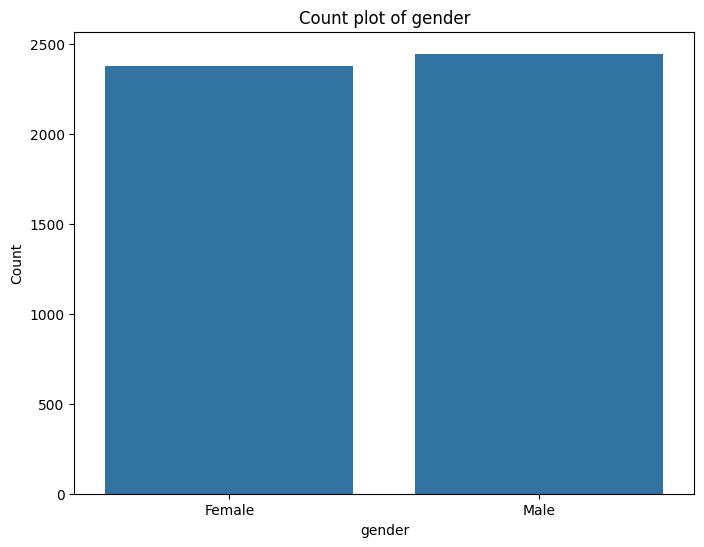

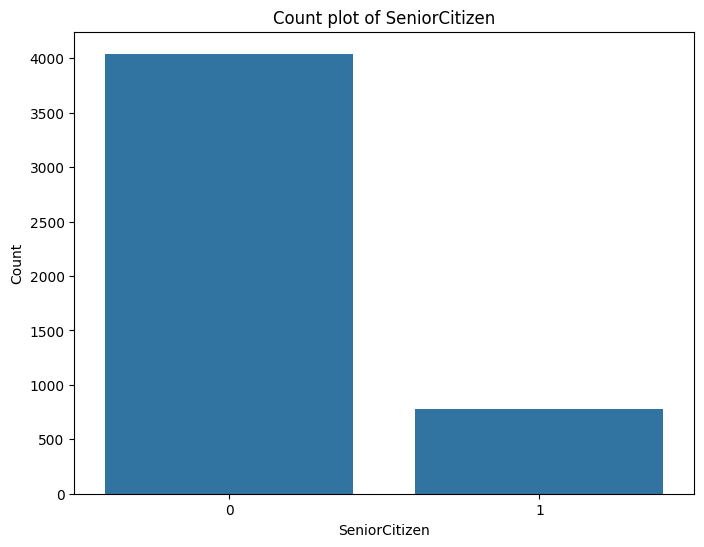

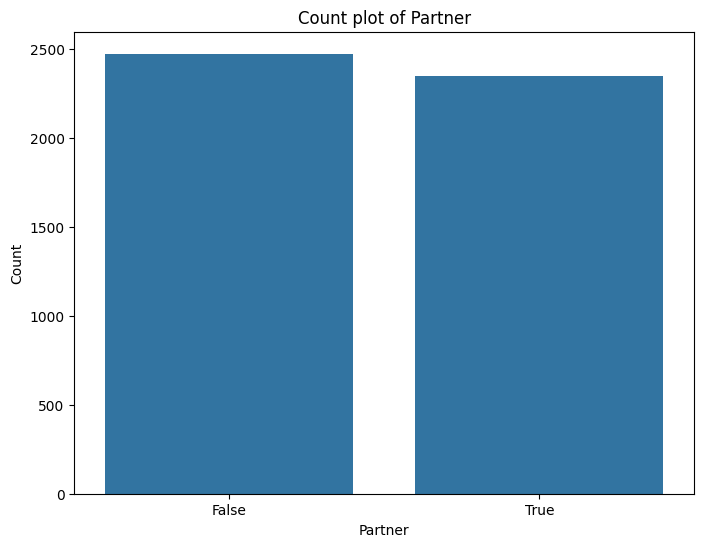

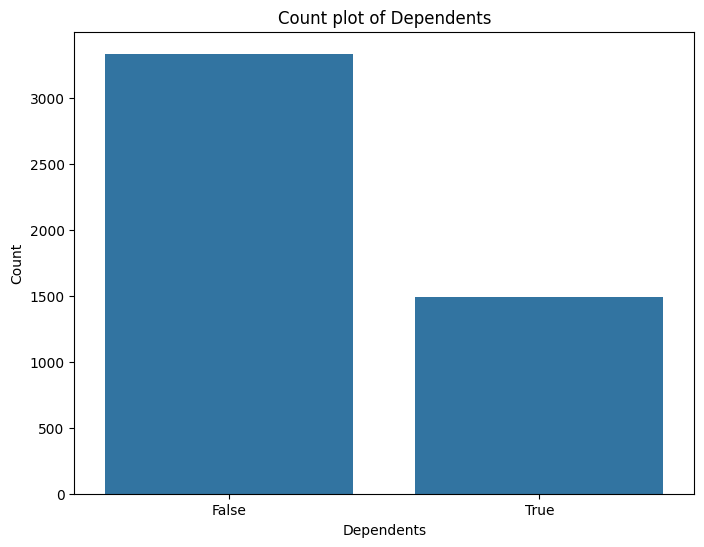

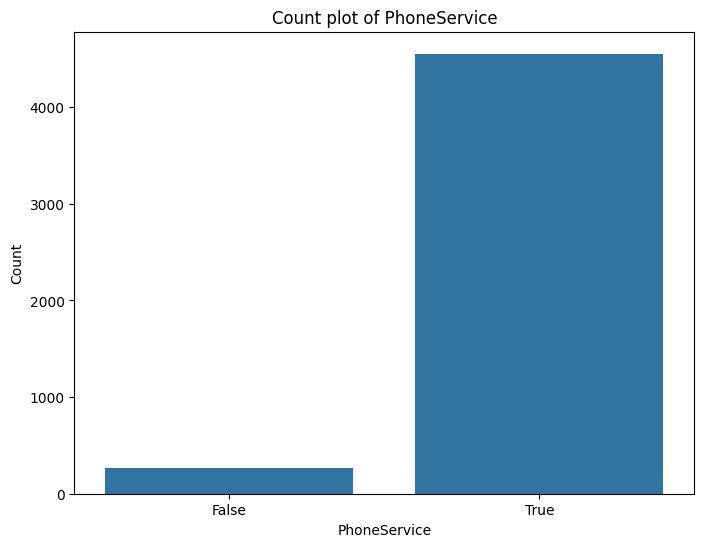

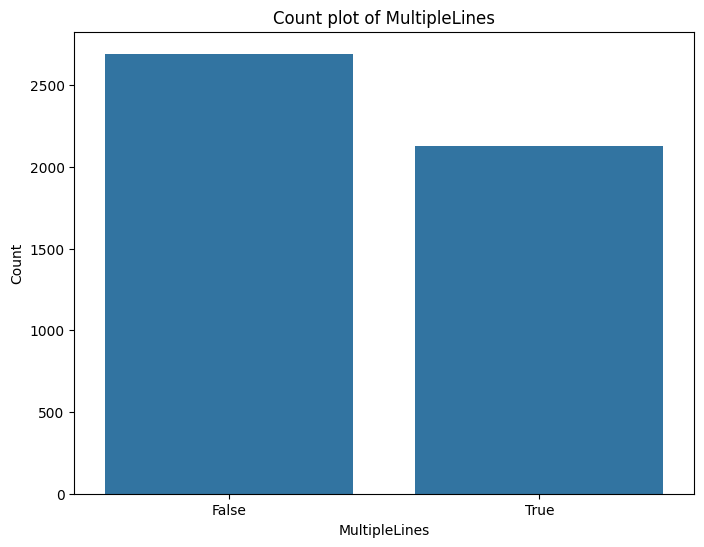

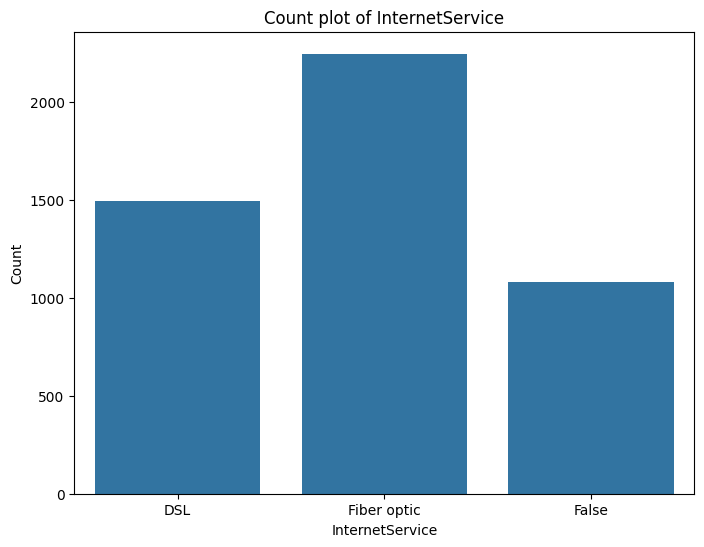

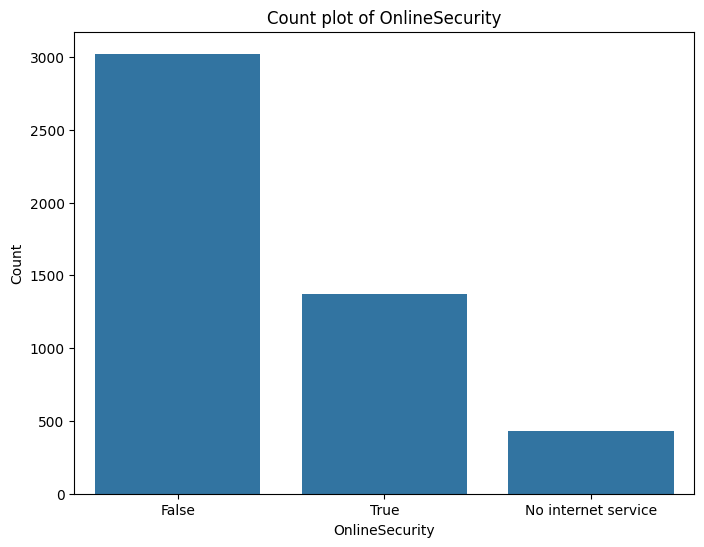

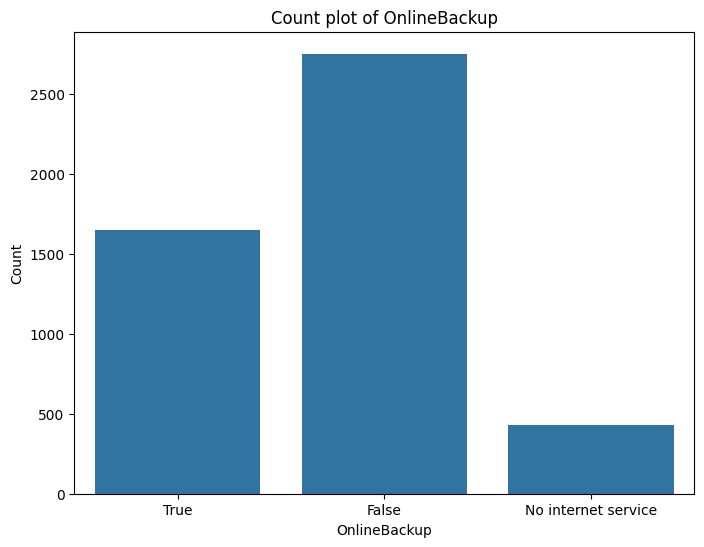

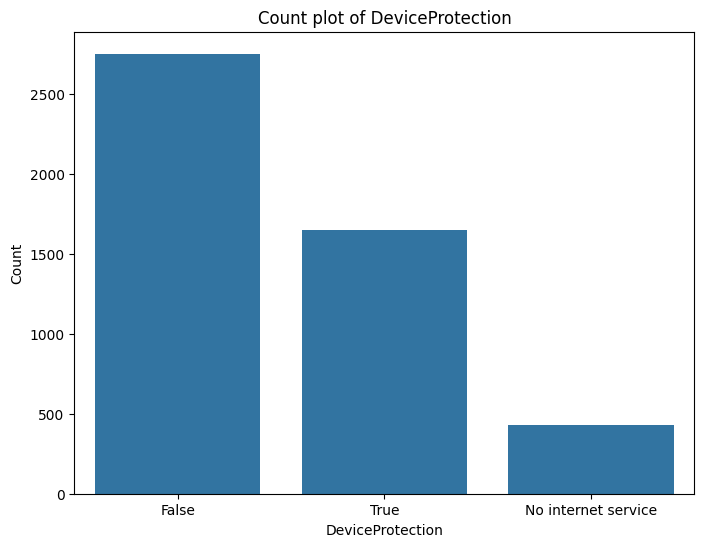

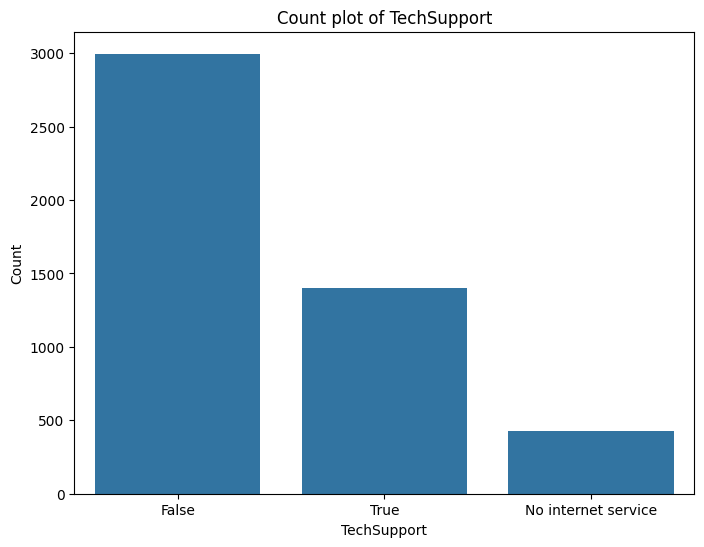

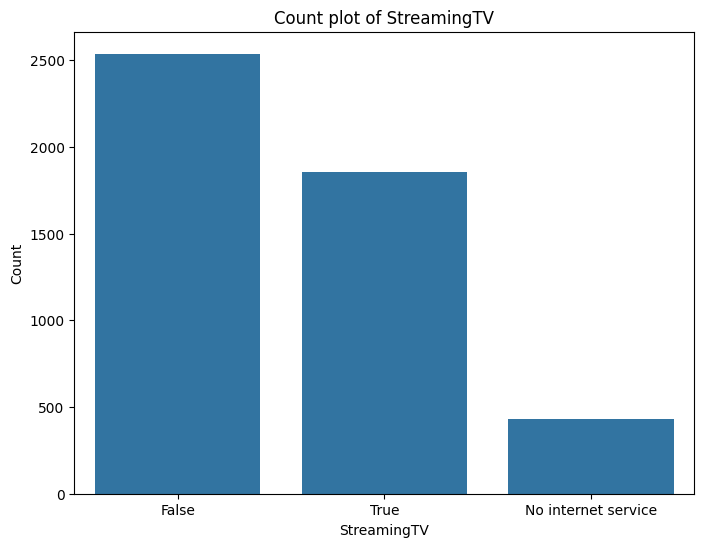

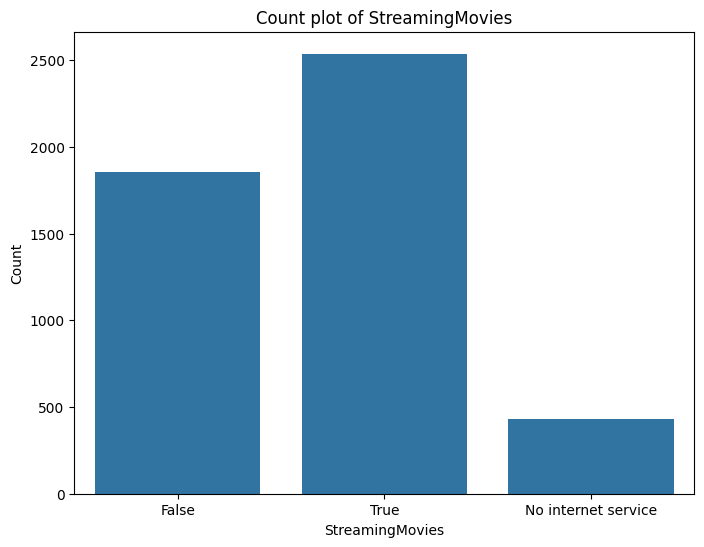

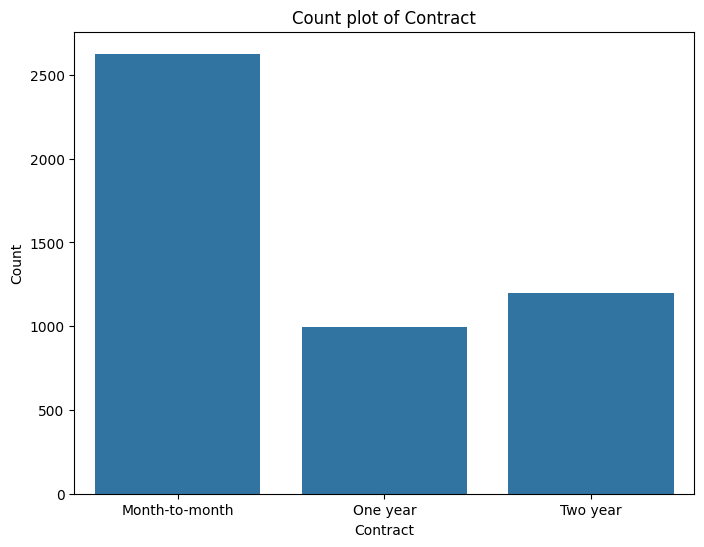

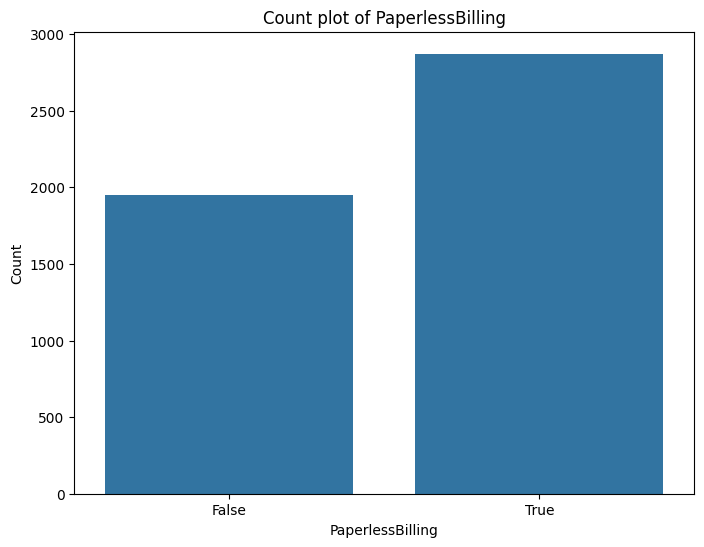

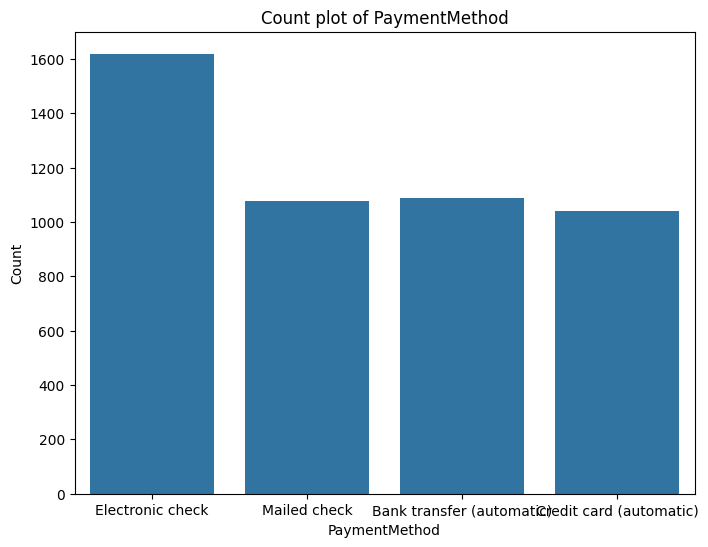

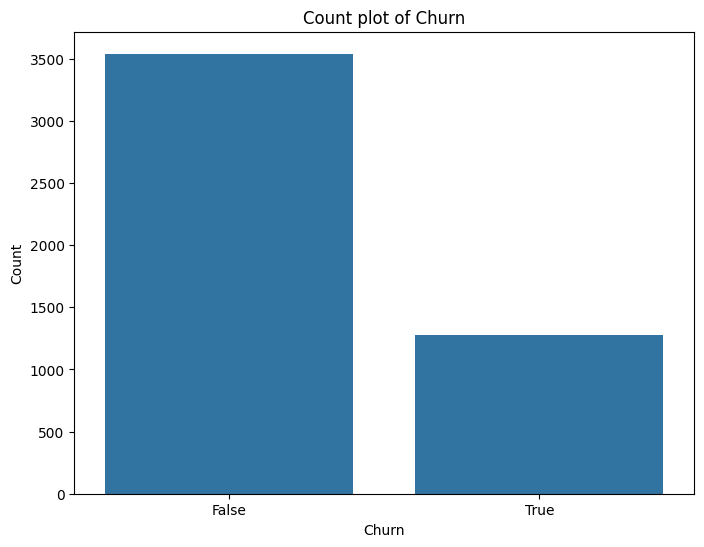

In [25]:
# Replace "No" with False and "Yes" with True
data_combined.replace({"No": False, "Yes": True}, inplace=True)

# Remove rows where 'MultipleLines' is 'No phone service'
data_combined= data_combined[data_combined['MultipleLines'] != 'No phone service']


# Count plots for categorical features: Provides the frequency distribution of categorical variables, highlighting the proportion of each category in the dataset.
categorical_columns = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data_combined, x=col)
    plt.title(f'Count plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


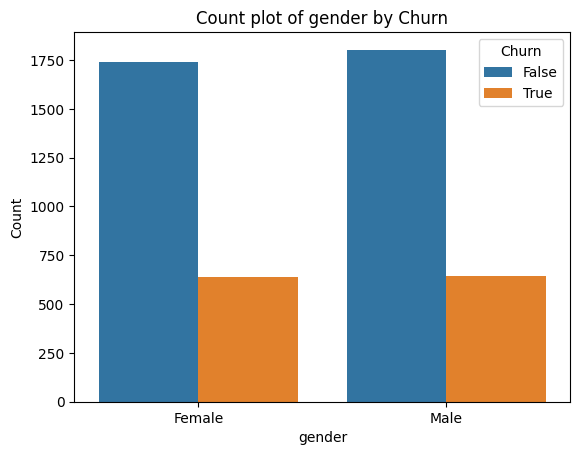

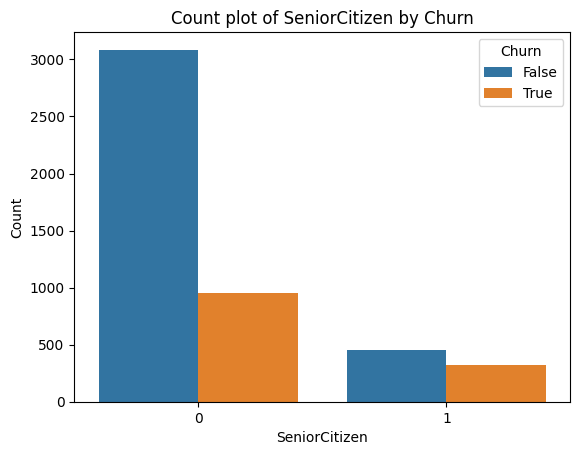

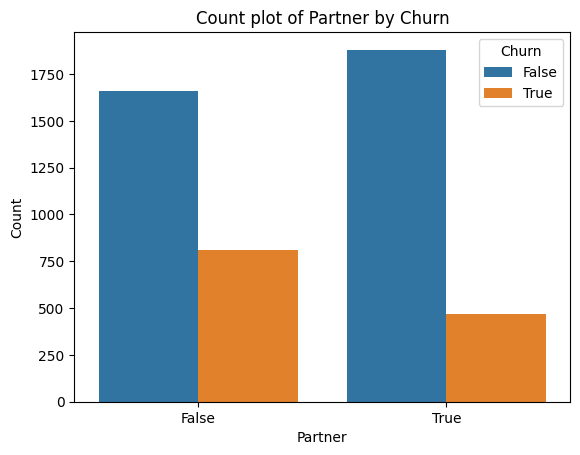

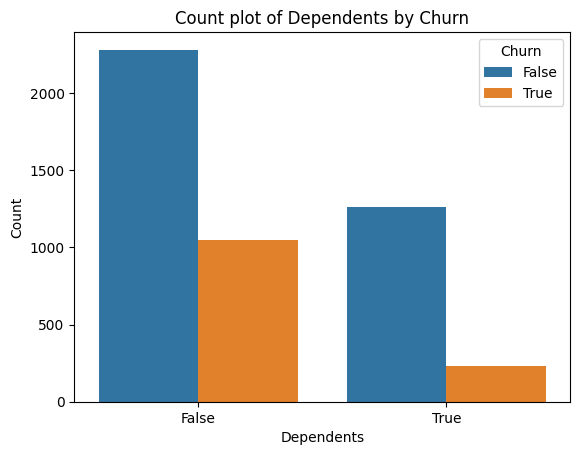

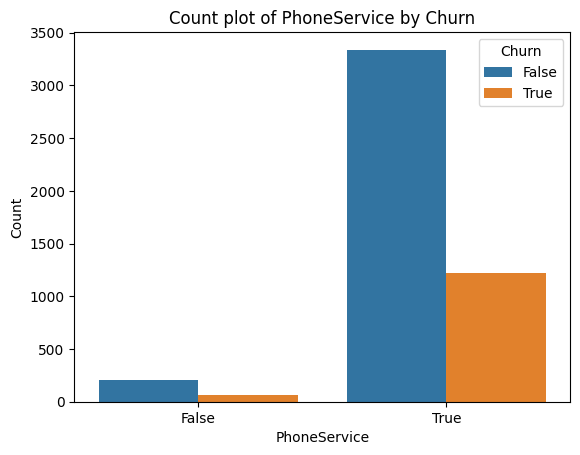

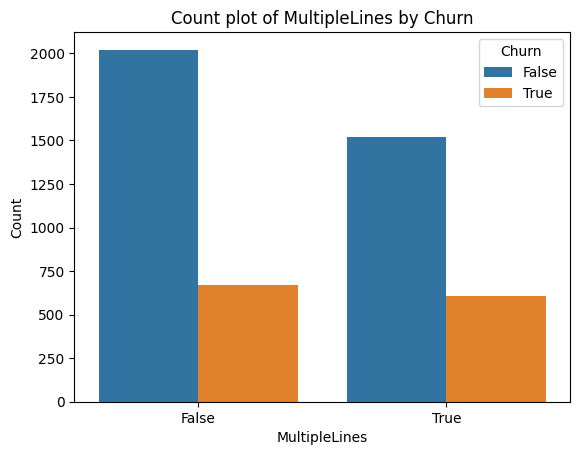

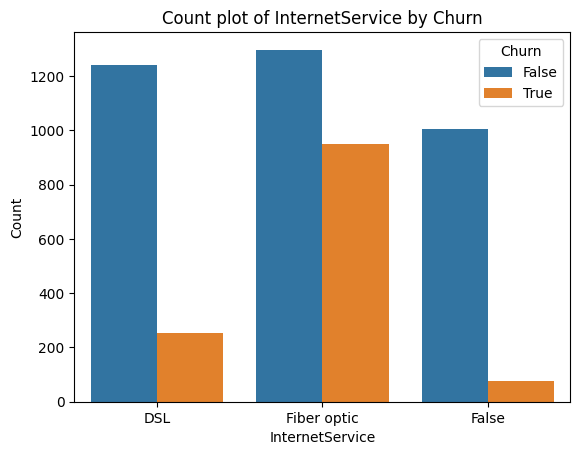

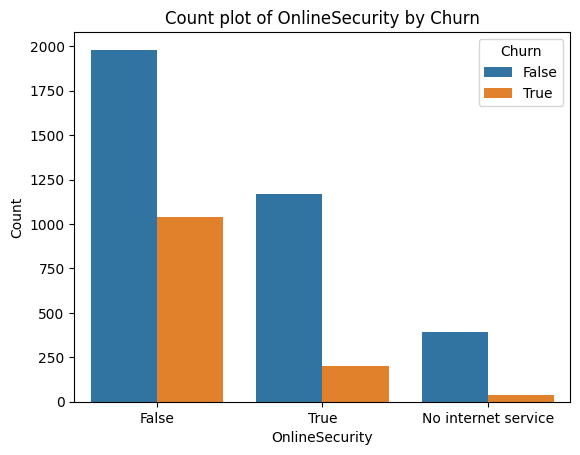

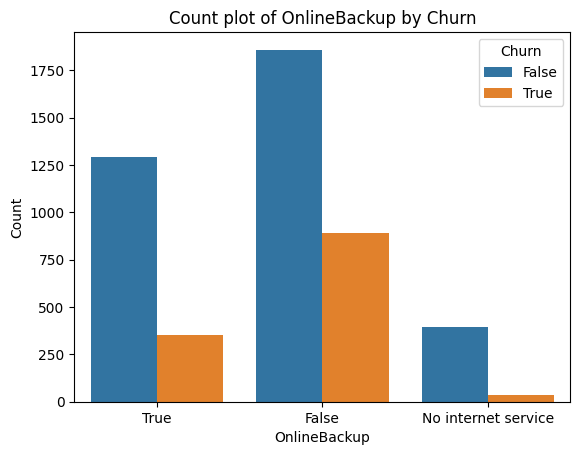

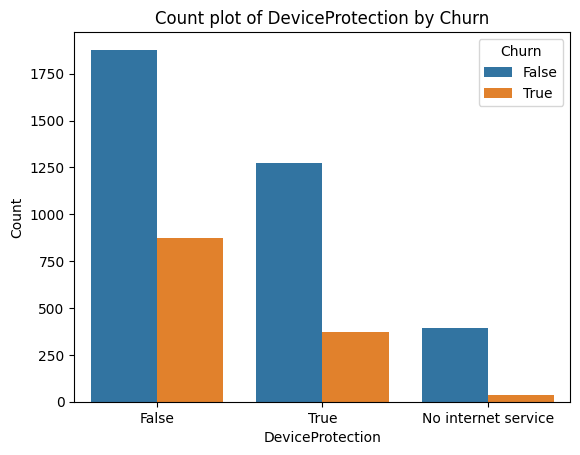

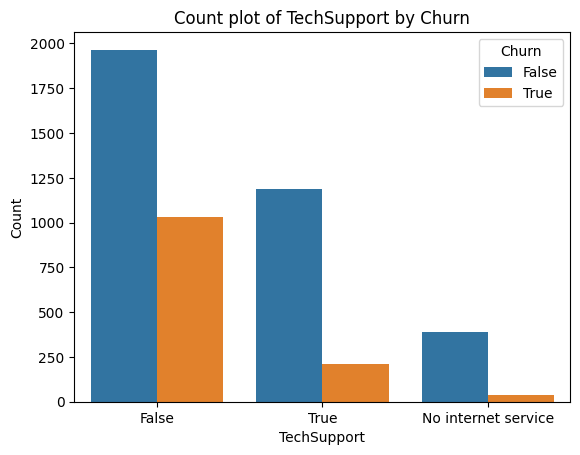

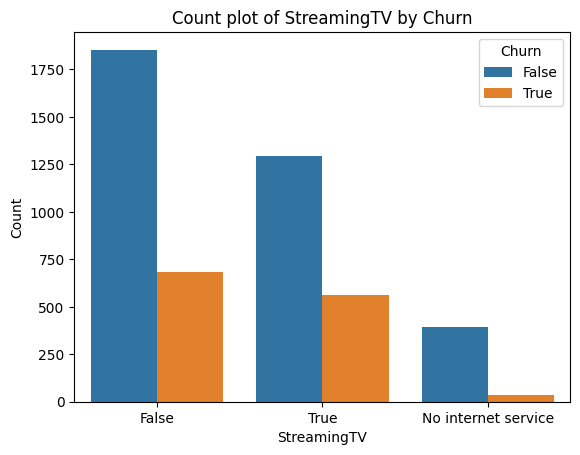

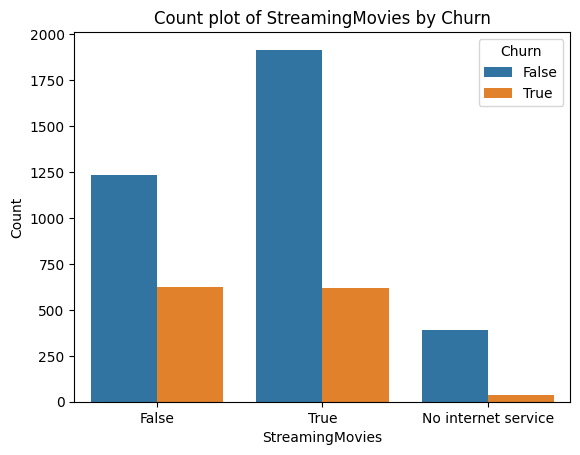

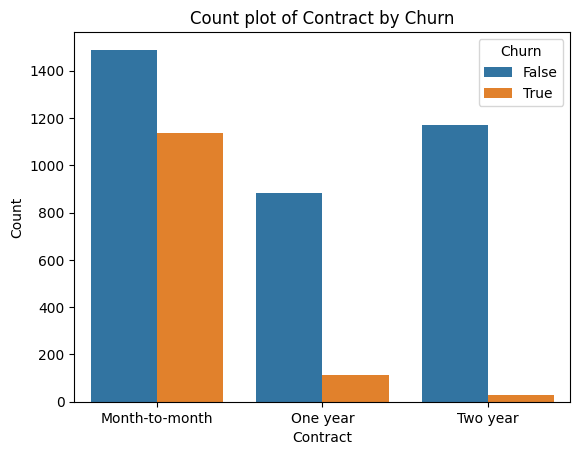

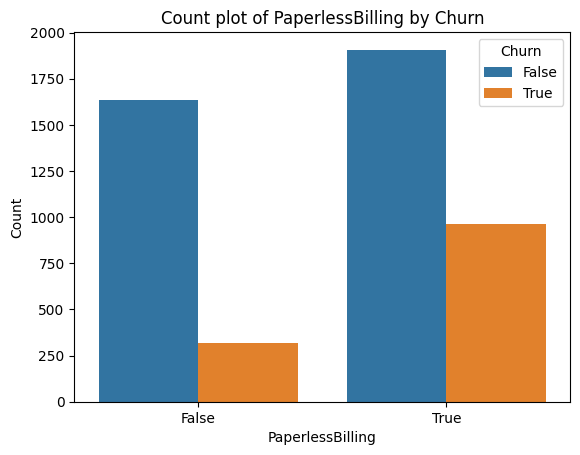

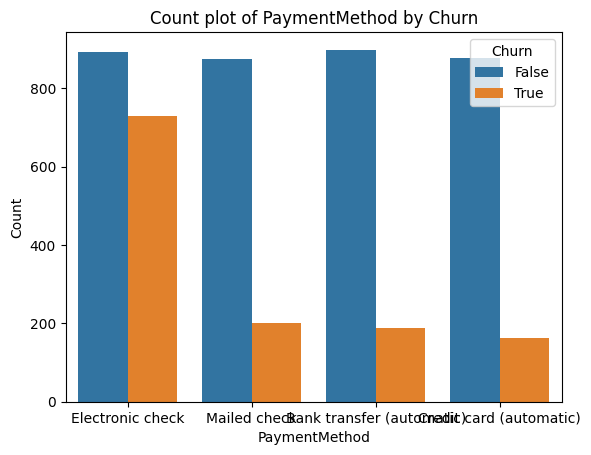

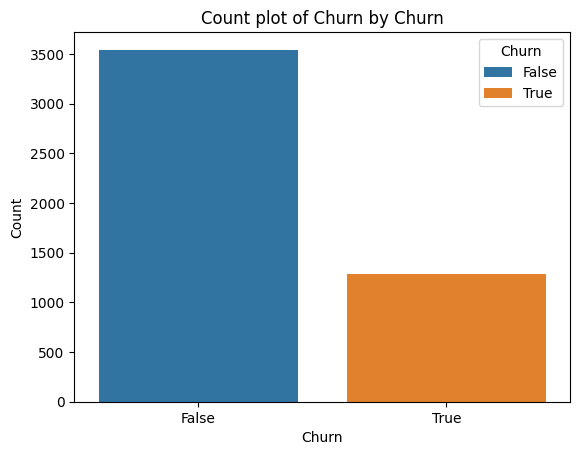

In [26]:
# Count plots for categorical features grouped by Churn
for col in categorical_columns:
    sns.countplot(data=data_combined, x=col, hue='Churn')
    plt.title(f'Count plot of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Key Insights of count plot for categorical features grouped by churn:

Gender: Shows a balanced distribution of churn across genders.

SeniorCitizen: Higher churn rates among senior citizens.

Partner: Customers without partners show higher churn rates.

Dependents: Customers without dependents show higher churn rates.

InternetService: Fiber optic users have higher churn rates compared to DSL and no internet service.



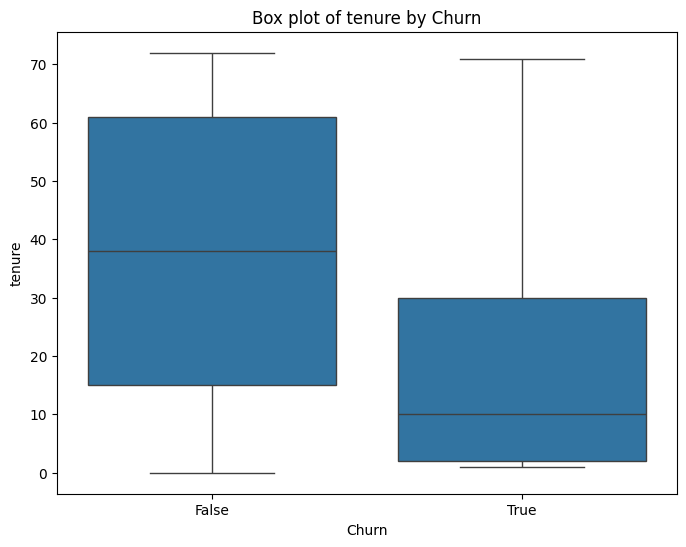

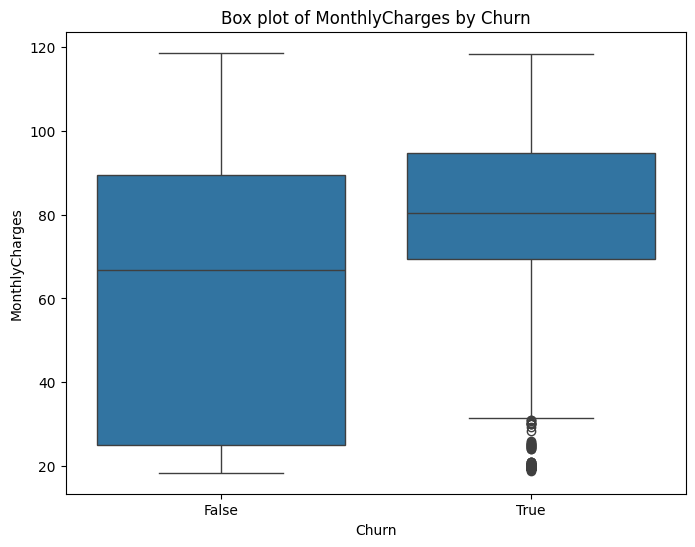

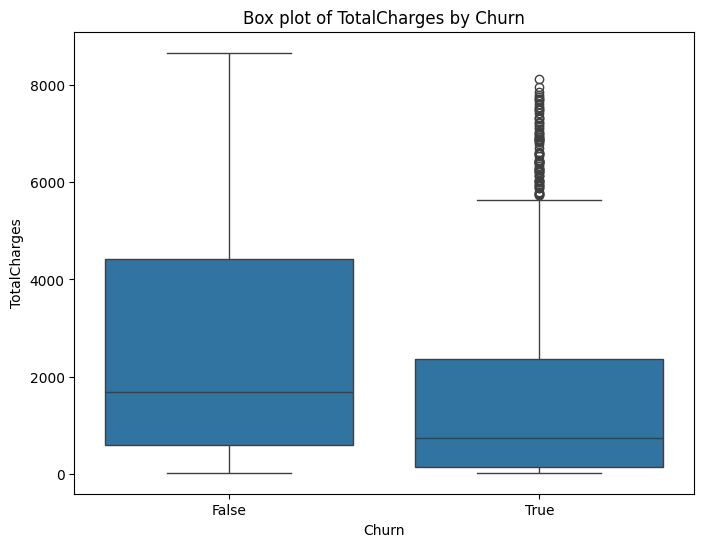

In [27]:
# Box plots for numerical features grouped by Churn
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data_combined, x='Churn', y=col)
    plt.title(f'Box plot of {col} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

Key Insights of Box Plots for Numerical Features Grouped by Churn:

Tenure: Customers with shorter tenure are more likely to churn.

MonthlyCharges: Higher monthly charges are associated with higher churn rates.

TotalCharges: Lower total charges are associated with higher churn rates, likely due to shorter tenure.

iii. Multivariate Analysis

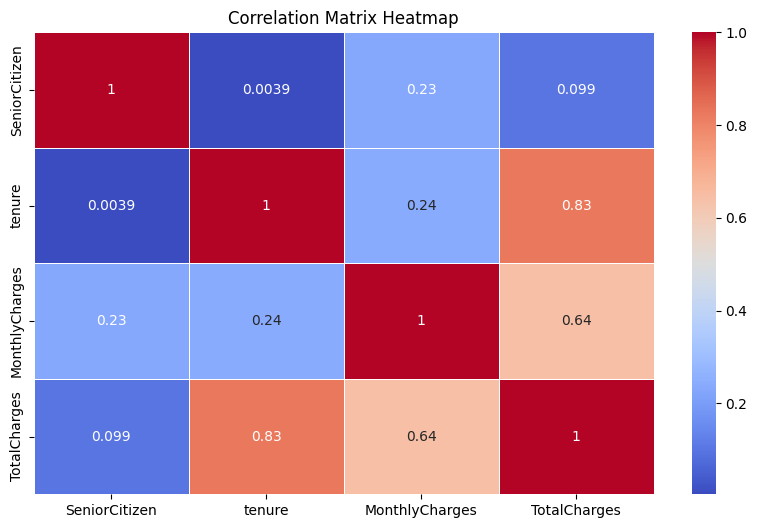

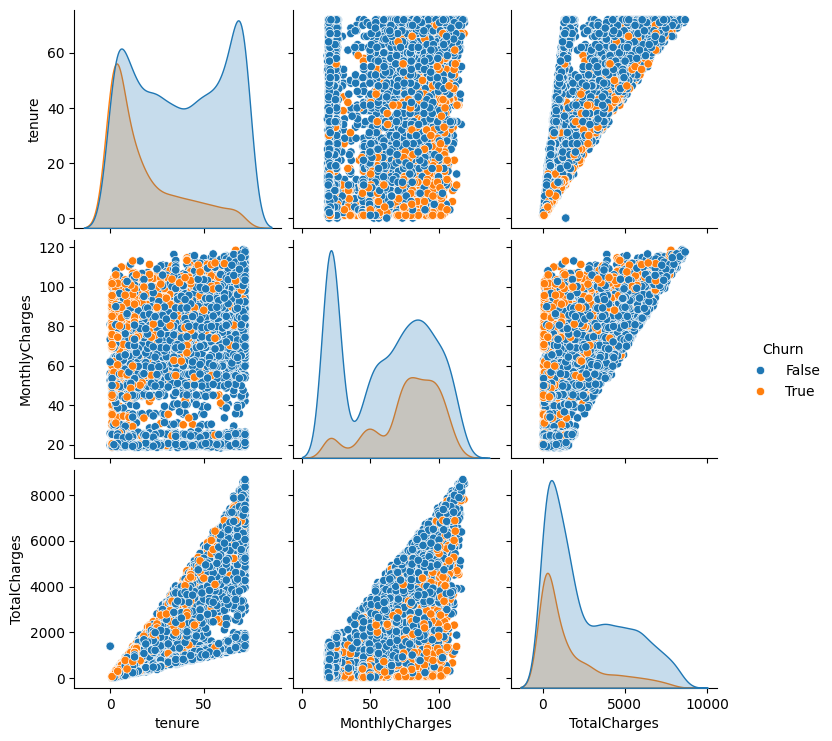

In [28]:
# Select only numeric columns for correlation matrix
numeric_df = data_combined.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Pair plot for numerical features -Visualizes relationships between multiple numerical features and their distribution with respect to Churn.
sns.pairplot(data_combined[numerical_columns + ['Churn']], hue='Churn')
plt.show()






Key Insights from Correlation Matrix Heatmap:

1. There is a strong correlation between tenure and TotalCharges. 


2. There is a relatively low correlation of SeniorCitizen with other features. This suggests that age alone is not a strong predictor of MonthlyCharges, tenure, or TotalCharges. 




Key Insights from Pair Plot for Numerical Features:

1. Churned customers (orange points) are more prevalent among those with shorter tenure and higher monthly charges.

2. Non-churned customers (blue points) tend to have a more even distribution across tenure, monthly charges, and total charges.




D. Answering the Business Questions

2. What is the relationship between monthly charges and customer churn?




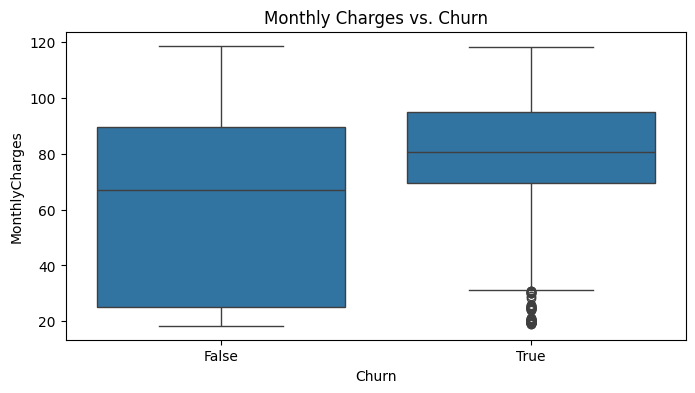

In [29]:
# Plot MonthlyCharges vs. Churn
plt.figure(figsize=(8, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data_combined)
plt.title('Monthly Charges vs. Churn')
plt.show()


Answer:


What is the relationship between tenure and customer churn?

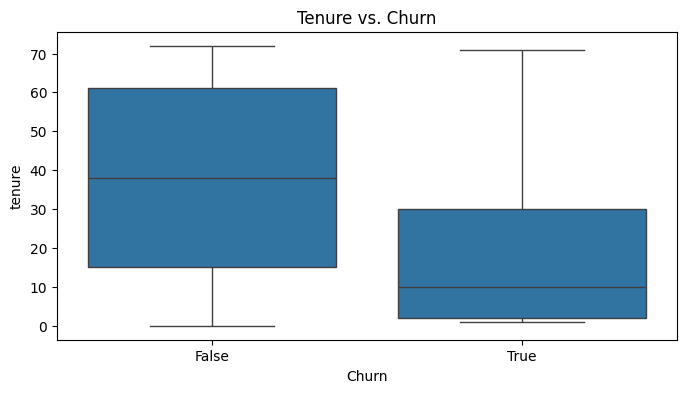

In [30]:
# Plot Tenure vs. Churn
plt.figure(figsize=(8, 4))
sns.boxplot(x='Churn', y='tenure', data=data_combined)
plt.title('Tenure vs. Churn')
plt.show()


Answer:

What is the relationship between monthly charges, tenure, and customer churn?

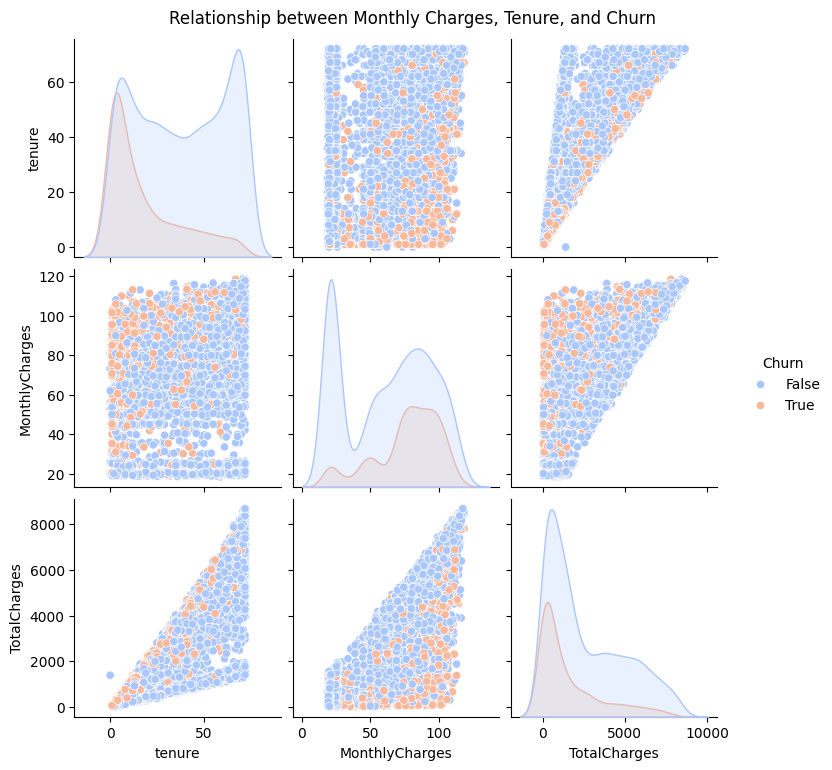

In [31]:
# Pair plot for MonthlyCharges, Tenure, and Churn
sns.pairplot(data_combined, vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn', palette='coolwarm')
plt.suptitle('Relationship between Monthly Charges, Tenure, and Churn', y=1.02)
plt.show()


Answer: 

 What is the lifetime value of each customer?

count    4823.000000
mean     2334.184564
std      2295.868474
min         0.000000
25%       412.474995
50%      1403.149971
75%      3954.450000
max      8510.400000
Name: CLV, dtype: float64


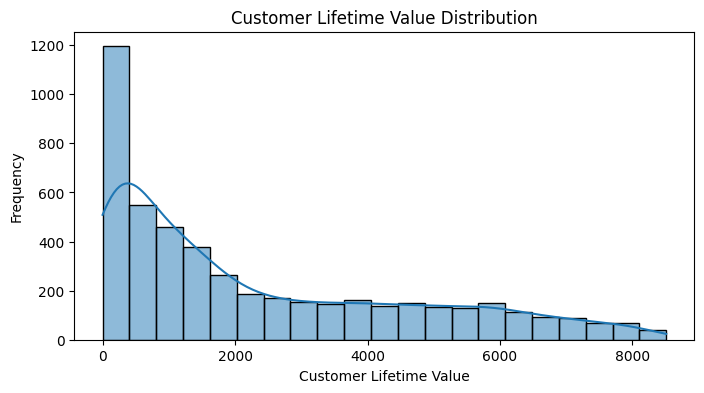

In [32]:
# Calculating Lifetime Value (CLV)
data_combined['CLV'] = data_combined['MonthlyCharges'] * data_combined['tenure']

# Display summary statistics of CLV
print(data_combined['CLV'].describe())

# Plot CLV distribution
plt.figure(figsize=(8, 4))
sns.histplot(data_combined['CLV'], kde=True)
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.show()


Answer:

## PHASE 3: BUILDING THE MODEL

a. Data Preparation

In [33]:

X = data_combined[['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables
y = data_combined['Churn'].astype(int)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


b. Model Training 

Here, we train 4 models; Logistic Regression, Decision Tree Classifier, Random Forest Classifier  and Support Vector Machine

In [34]:

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svc = SVC(probability=True)

# Train models
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svc.fit(X_train, y_train)


SVC(probability=True)

c. Model Evaluation 

Here, we evaluate the model using various metrics

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    return accuracy, precision, recall, f1, roc_auc

# Evaluate each model
models = [log_reg, decision_tree, random_forest, svc]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
results = {}

for model, name in zip(models, model_names):
    results[name] = evaluate_model(model, X_test, y_test)

# Display the results
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
results_df


,Logistic Regression,Decision Tree,Random Forest,SVM
Accuracy,0.787837,0.713200,0.761576,0.715964
Precision,0.696970,0.494949,0.611486,0.000000
Recall,0.447689,0.476886,0.440389,0.000000
F1-Score,0.545185,0.485750,0.512023,0.000000
ROC-AUC,0.822003,0.646738,0.791366,0.794431


d. Model Selection

In [37]:
# Select the best model based on ROC-AUC
best_model_name = results_df.loc['ROC-AUC'].idxmax()
best_model = models[model_names.index(best_model_name)]

print(f"The best model is {best_model_name} with an ROC-AUC of {results_df.loc['ROC-AUC', best_model_name]:.2f}")


The best model is Logistic Regression with an ROC-AUC of 0.82


e. Model Evaluation